In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
img1 = cv2.imread("dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

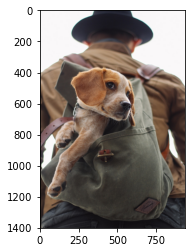

In [4]:
plt.imshow(img1)

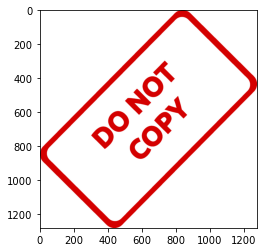

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
img2.shape

(1280, 1277, 3)

In [8]:
#BLENDING IMAGES OF THE SAME SIZE
# resizing images to make them equal to each other
img1 = cv2.resize(img1,(1200, 1200)) #(width, height)
img2 = cv2.resize(img2,(1200, 1200))

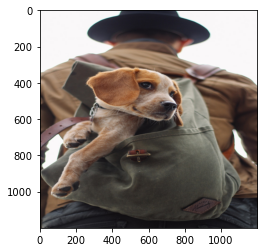

In [9]:
plt.imshow(img1)

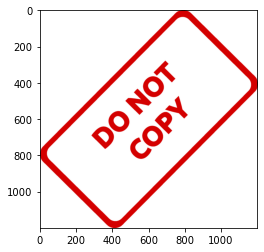

In [10]:
plt.imshow(img2)

In [11]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0) #equal amount of representation of both the images

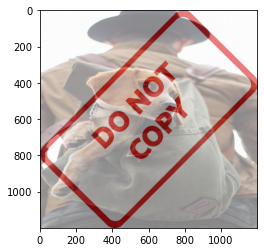

In [12]:
plt.imshow(blended)

In [13]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0) #more representation of image1 

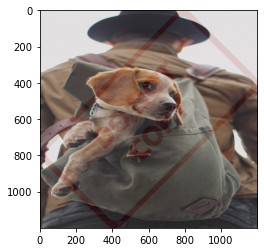

In [14]:
plt.imshow(blended)

In [15]:
# Overlay small image on top of a larger image (NO BLENDING)
# Numpy reassignment
img1 = cv2.imread("dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [16]:
img2 = cv2.resize(img2,(600, 600))

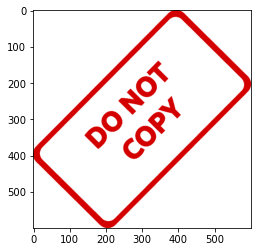

In [17]:
plt.imshow(img2)

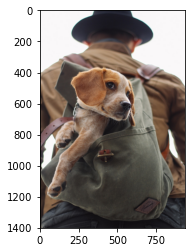

In [18]:
plt.imshow(img1)

In [19]:
large_img = img1
small_img = img2

In [20]:
x_offset = 0
y_offset = 0

In [21]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [22]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

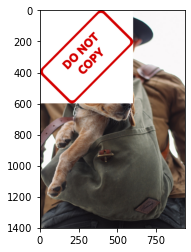

In [23]:
plt.imshow(large_img)

In [24]:
# BLENDING together images of different sizes
img1 = cv2.imread("dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [25]:
img2 = cv2.resize(img2,(600, 600))

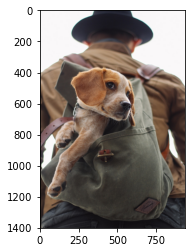

In [26]:
plt.imshow(img1)

In [27]:
img1.shape

(1401, 934, 3)

In [28]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [29]:
img2.shape

(600, 600, 3)

In [30]:
rows, cols, channels = img2.shape

In [31]:
rows

600

In [32]:
cols

600

In [33]:
roi = img1[y_offset:1401,x_offset:934]

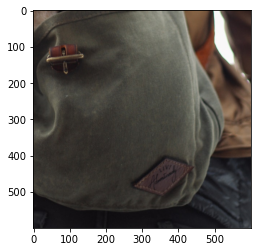

In [34]:
plt.imshow(roi)

In [35]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

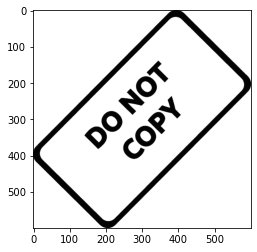

In [36]:
plt.imshow(img2gray, cmap='gray')

In [37]:
mask_inv = cv2.bitwise_not(img2gray)

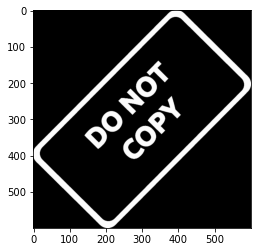

In [39]:
plt.imshow(mask_inv, cmap='gray')

In [40]:
mask_inv.shape

(600, 600)

In [41]:
import numpy as np

In [42]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [43]:
white_background.shape

(600, 600, 3)

In [44]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

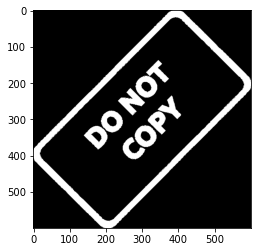

In [45]:
plt.imshow(bk)

In [46]:
bk.shape

(600, 600, 3)

In [47]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

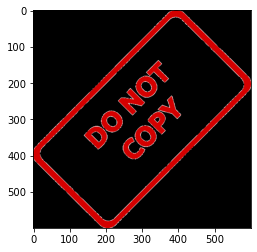

In [48]:
plt.imshow(fg)

In [49]:
final_roi = cv2.bitwise_or(roi,fg)

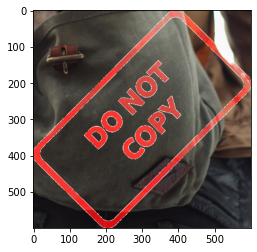

In [50]:
plt.imshow(final_roi)

In [51]:
large_img = img1
small_img = final_roi

In [52]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

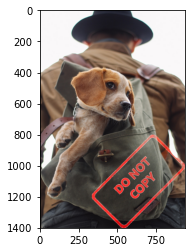

In [53]:
plt.imshow(large_img)